<a href="https://colab.research.google.com/github/XingruiWang/Animefy/blob/master/Notebook/Animefy-yourself-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animefy yourself!

A markdown introduction is [here](https://github.com/XingruiWang/Animefy/blob/master/README.md), which include the detailed description and code.

<img src="https://raw.githubusercontent.com/XingruiWang/Animefy/master/example/example.png" alt="example" style="width: 100%;" />


### 1: About

A "selfie2anime" project based on StyleGAN2. You can generate your own animate faces base on real-world selfie. The whole "selfie2anime" project is based on StyleGAN2\[[Official code](https://github.com/NVlabs/stylegan2)\]\[[paper](https://arxiv.org/abs/1912.04958)\]\[[video](https://youtu.be/c-NJtV9Jvp0)\]and layer swapping technique proposed by [Justin Pinkney](https://www.justinpinkney.com/). And also thanks for the highly reproduceable Pytorch reimplementing styleGAN2 project by [Tetratrio](https://github.com/Tetratrio/stylegan2_pytorch) .


Folder tree:

```
Animefy
│  README.md -------------------------------- Description of the projects.
│  latent.sh -------------------------------- The script to find latent feature of a given image.
│  run.sh ----------------------------------- The script to train the model.
│  synthesis.sh ----------------------------- The script to generate animate image without condition.
│  align_images.py -------------------------- Align the face of given images, since the given selfie image might not in the same scale.
│  blend.py --------------------------------- Blend the model after well trained.
│  generate.py ------------------------------ Generate animate image based on the latent code.
│  run_convert_from_tf.py ------------------- Convert pretrained model file in tensorflow to pytorch.
│  run_generator.py ------------------------- Generate animte images without condition (i.e. latent code), called by `synthesis.sh`.
│  run_metrics.py --------------------------- Caculate the metric of trained model.
│  run_projector.py ------------------------- Find latent feature of a given image, called by `latent.sh`.
│  run_training.py -------------------------- Train the model, called by `run.sh`.
│  requirements.txt ------------------------- Environment required, can be set up using `pip install -r requirements.txt`.
│  settings_with_pretrain.yaml -------------- Configuration when training the model.
│
├─environment
│      anime.yaml
│
├─example
│      example.png ------------------------- Example image of the process of finding latent code and generate corresponding anime image by interating.
│
├─Notebook
│      Animefy-yourself.ipynb -------------- Description notebook of the project.
│
├─projects
│  │  resize.py ---------------------------- Might be useless now, resize the selfie image to 512 × 512.
│  │
│  └─latent
│          image0000-target.png
│
└─stylegan2 -------------------------------- Core files.
    │  loss_fns.py ------------------------- Loss function.
    │  models.py --------------------------- StyleGAN2 model file
    │  modules.py -------------------------- Dependence module of StyleGAN2.
    │  project.py -------------------------- Find the latent code.
    │  train.py ---------------------------- Define class `Trainer` to train the model.
    │  utils.py ---------------------------- Utility file of model and training.
    │  __init__.py ------------------------- Using for importing.
    │
    ├─external_models
    │      inception.py -------------------- Inception module.
    │      lpips.py ------------------------ Caculate the similarity between images.
    │      __init__.py
    │
    └─metrics ------------------------------ Metric file.
            fid.py ------------------------- Fréchet Inception Distance。
            ppl.py ------------------------- Perplexity.
            __init__.py -------------------- Using for importing.

```


### 3. Train the model

#### 3.1. Dataset

The animate faces datast we used is [here](http://www.seeprettyface.com/mydataset_page3.html#anime)，this dataset is processed from [DANBOORU2018](https://www.gwern.net/Danbooru2020#danbooru2018). The dataset contains 140000 animate faces.[[Baidu Drive](https://pan.baidu.com/share/init?surl=8pHjzcOWhVF2u6LKOlT3yg) (code：JIMD)]

#### 3.2. Installation

1. Clone from github：

In [1]:
!git clone https://github.com/XingruiWang/Animefy.git
%cd Animefy

Cloning into 'Animefy'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 459 (delta 63), reused 0 (delta 0), pack-reused 305
Receiving objects: 100% (459/459), 35.75 MiB | 23.53 MiB/s, done.
Resolving deltas: 100% (178/178), done.
/content/Animefy


2. Dependencies（finish in command line）

```bash
conda env create -f environment/anime.yaml
conda activate anime
pip install -r requirements.txt
```

#### 3.3. Training

(Due to the size of origin dataset, I use sample data here. If your want to train on the original data, please download it first)

- Download pretrain model on FFHQ `./G_pretrain.pth` ([google drive](https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR))

In [2]:
!gdown --id 19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR

Downloading...
From: https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR
To: /content/Animefy/G_pretrain.pth
121MB [00:00, 158MB/s] 


- Train by running

In [3]:
!python run_training.py settings.yaml

Traceback (most recent call last):
  File "run_training.py", line 1010, in <module>
    main()
  File "run_training.py", line 1005, in main
    run(args)
  File "run_training.py", line 973, in run
    trainer = get_trainer(args)
  File "run_training.py", line 882, in get_trainer
    master_port=args.master_port
  File "/content/Animefy/stylegan2/train.py", line 232, in __init__
    self.G = G.train().to(self.device)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 673, in to
    return self._apply(convert)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 387, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 387, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 387, in _apply
    module._apply(fn)
  [Previous line repeated 1 more time]
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules

or running in script `run.sh`

```bash
sh run.sh
```

* Here `settings.yaml` store the configuration of training. If you want to train it again, set `data_dir` to your own animate face data. And you can set `g_file` and `d_file` if your are loading the pretrain model.

```yaml
# Here is an example training config file for 512x512 images.
channels: [32, 64, 128, 256, 512, 512, 512, 512]
tensorboard_log_dir: 'runs/stylegan2_512x512'
tensorboard_image_interval: 20
checkpoint_dir: 'checkpoints/stylegan2_512x512'
checkpoint_interval: 500
data_dir: data/anime_face
output_dir: train_output
gpu: [0, 1, 2, 3]
g_file: G_pretrain.pth
iterations: 10000

```

* For the first time of training, I set `G_file` to the pretrain model of FFHQ face data, while `D_file` is not compulsory.

- I train the model on 4 GPUs (Titan V)，for around 20,000 iteration (not epochs) and 2 days in total. 

- You can download my pretrain model `./G_out.pth` ([google drive](https://drive.google.com/file/d/1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk/view?usp=sharing))

In [14]:
!gdown --id 1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk

Downloading...
From: https://drive.google.com/uc?id=1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk
To: /content/Animefy/G_out.pth
121MB [00:00, 182MB/s]


### Layer Swapping

- The trained model is not enough to generate custom animate faces. Inspired by  [Justin Pinkney](https://www.justinpinkney.com/), we blended the human faces generating model and our animate faces generating model in order to keep the low resolution information of real world human face (gesture, head position and angle) and high resolution information (big eyes, small nose, hair style and etc. ) of animate faces. 

- I reimplement the [blend_models.py](https://github.com/justinpinkney/stylegan2/blob/master/blend_models.py) by pytorch ([here](https://github.com/XingruiWang/Animefy/blob/master/blend.py))


In [15]:
from blend import blend_models

G_out = blend_models("G_pretrain.pth", 
                     "G_out.pth", 
                     8, None)
G_out.save('G_blend.pth')

### Generate your animate faces！

In [16]:
%mkdir raw
%mkdir latent
%mkdir aligned

mkdir: cannot create directory ‘raw’: File exists
mkdir: cannot create directory ‘aligned’: File exists


1. Put your photo in the folder `raw`.

Here I use a sample images.

In [17]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/6d/Shinz%C5%8D_Abe_Official.jpg -O raw/example.jpg

--2021-03-27 07:42:06--  https://upload.wikimedia.org/wikipedia/commons/6/6d/Shinz%C5%8D_Abe_Official.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332712 (325K) [image/jpeg]
Saving to: ‘raw/example.jpg’

raw/example.jpg     100%[===================>] 324.91K  --.-KB/s    in 0.09s   

2021-03-27 07:42:06 (3.63 MB/s) - ‘raw/example.jpg’ saved [332712/332712]



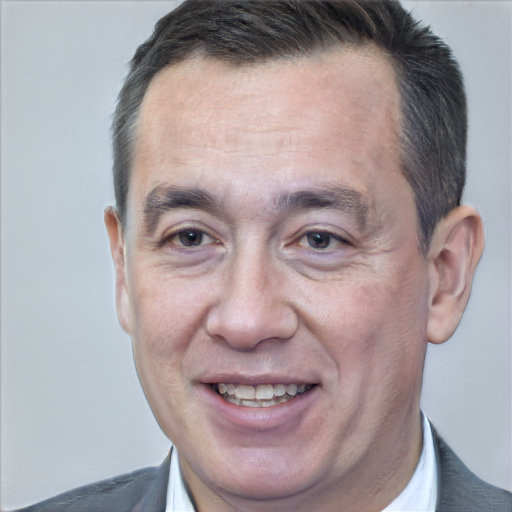

In [24]:
from IPython.display import Image
Image(filename='raw/example.png') 

2. Face alignment

In [25]:
!python align_images.py raw aligned

2021-03-27 07:43:45.681098: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


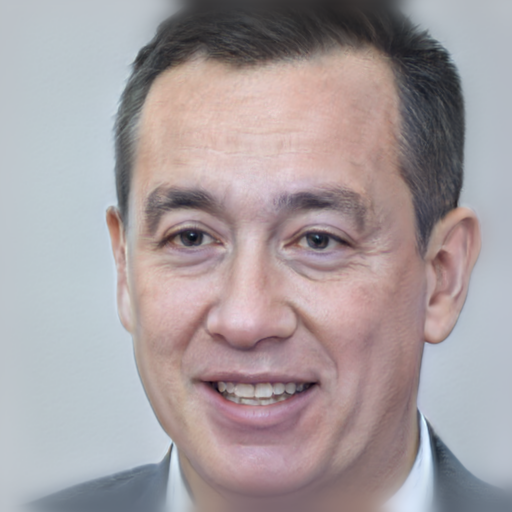

In [26]:
Image(filename='aligned/example_01.png') 

3. Feature projection

In [27]:
!python run_projector.py project_real_images --network=G_pretrain.pth --data_dir=aligned --output=latent/ --num_steps=400 --gpu=0

Loading images from "aligned"...
Done!
                          

Gathering dlatents...
                          

Done!
100% 10/10 [00:00<00:00, 240.37it/s]
;;;;;;;;;;;;;;;;;;;;;;;;;;;
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
                           

Projecting image(s) 1/1
loss: 1.655e+06, lpips_distance: 0.5471, lr: 0
noise_reg: 16.55
                                   

Projecting image(s) 1/1
loss: 1.648e+06, lpips_distance: 0.5456, lr: 0.005
noise_reg: 16.48
                                   

Projecting image(s) 

4. Gererate the image!

  0%|          | 0/6 [00:00<?, ?it/s]

image0000-step0081.npy


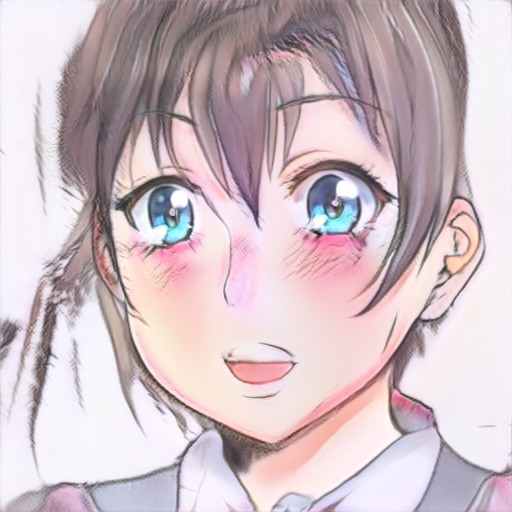

 17%|█▋        | 1/6 [00:03<00:18,  3.75s/it]

image0000-step0161.npy


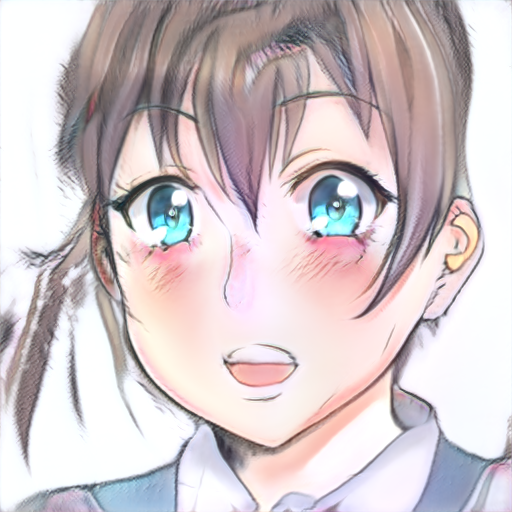

 33%|███▎      | 2/6 [00:04<00:11,  2.83s/it]

image0000-step0241.npy


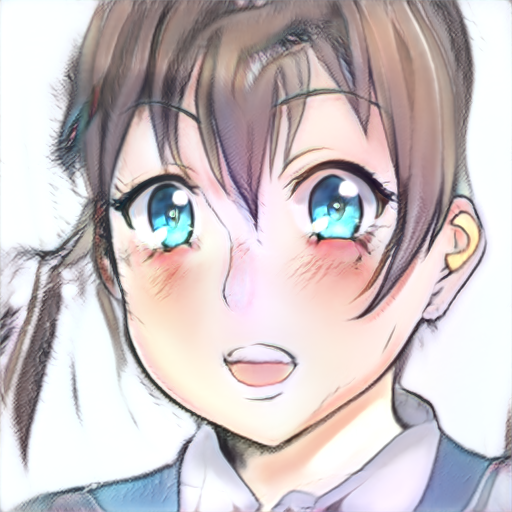

 50%|█████     | 3/6 [00:05<00:06,  2.17s/it]

image0000-step0321.npy


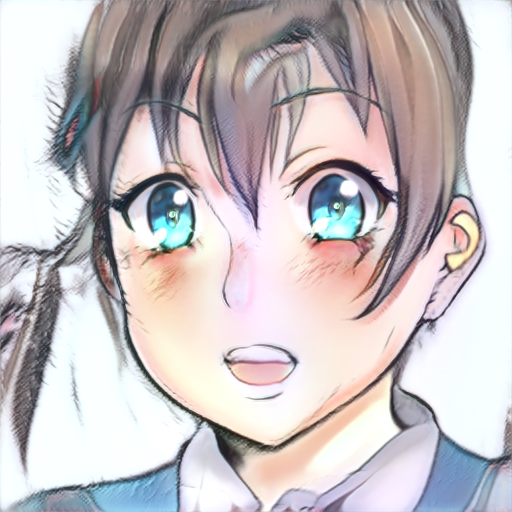

 67%|██████▋   | 4/6 [00:05<00:03,  1.71s/it]

image0000-step0400.npy


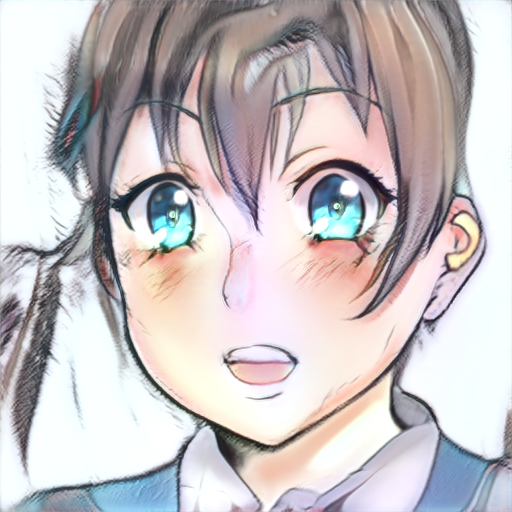

100%|██████████| 6/6 [00:06<00:00,  1.06s/it]


In [28]:
import os
import numpy as np
import torch
import stylegan2
from stylegan2 import utils
import cv2 as cv
from google.colab.patches import cv2_imshow
from tqdm import tqdm
dir = 'latent'

G_blend = 'G_blend.pth'
# G_blend = 'Gs.pth'

def synthesis(G_file, latent_file):
    device = torch.device(0)
    G = stylegan2.models.load(G_file).G_synthesis 
    latent = np.load(latent_file, allow_pickle=True)
    G.to(device)
    latent = torch.tensor(latent[np.newaxis, ...]).to(device)
    out = G(latent)
    out = utils.tensor_to_PIL(out, pixel_min=-1, pixel_max=1)[0]
    return out

for l in tqdm(sorted(os.listdir(dir))):
  if l[-3:] != 'npy':
    continue
  latent = os.path.join(dir, l)
  out = synthesis(G_blend, latent)
  print(l)
  display(out)

out.save('output.png')



